In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm
import matplotlib as mpl
import pandas as pd
import xarray as xr

import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')


import ml_estimation as ml
import model1_plots as mp
import Utilities as util

In [3]:
x = xr.open_dataset("../data/simulation/model1/sim_n=37_441x322_cf.nc")
x['z'] = x.z.astype(bool)
x['ct'][:] = util.classISCCP(np.exp(x.d), x.h)
x['ct'][:] = x.ct.where(~x.z, 1)
# x.h.where(x.h > 0).plot(x = 'i', y = 'j', col = 't', col_wrap = 4, cmap = cm.batlow)

# plt.figure()
# plt.hist2d(x.d.data.flatten(), x.h.data.flatten(), bins = 50, range = [[-1, 5], [0, 16e3]], norm = mpl.colors.LogNorm())
# plt.show()

In [4]:
x

<xarray.Dataset>
Dimensions:   (classes: 11, i: 441, j: 322, t: 37)
Coordinates:
  * i         (i) float64 1.1e+06 1.095e+06 1.09e+06 ... -1.104e+06 -1.109e+06
  * j         (j) float64 1.113e+06 1.108e+06 1.103e+06 ... -4.94e+05 -4.99e+05
  * t         (t) int64 0 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
Dimensions without coordinates: classes
Data variables:
    h         (t, i, j) float32 3.561e+03 2.342e+03 ... 2.178e+03 1.22e+04
    d         (t, i, j) float32 0.05102 0.3288 0.254 0.3885 ... 0.0 1.11 1.325
    ct        (t, i, j) float64 ...
    u         (t, i, j) float32 ...
    v         (t, i, j) float32 ...
    z         (t, i, j) bool False False False False ... False True False False
    cf        (t, classes) float64 ...
    sigma_cf  (t, classes) float64 ...
Attributes:
    extent:   [-50. -30.  -5.  15.]

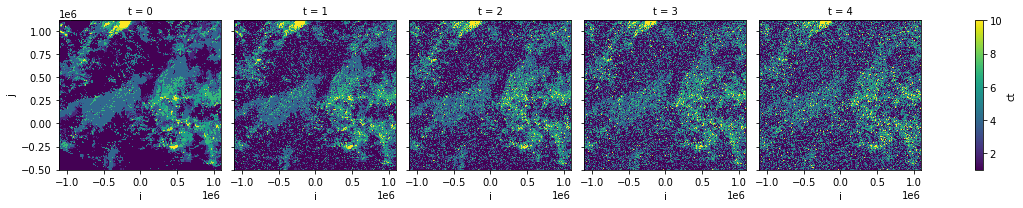

In [34]:
x.ct[x.t < 5].plot(x = 'i', y = 'j', col = 't', col_wrap = 5)

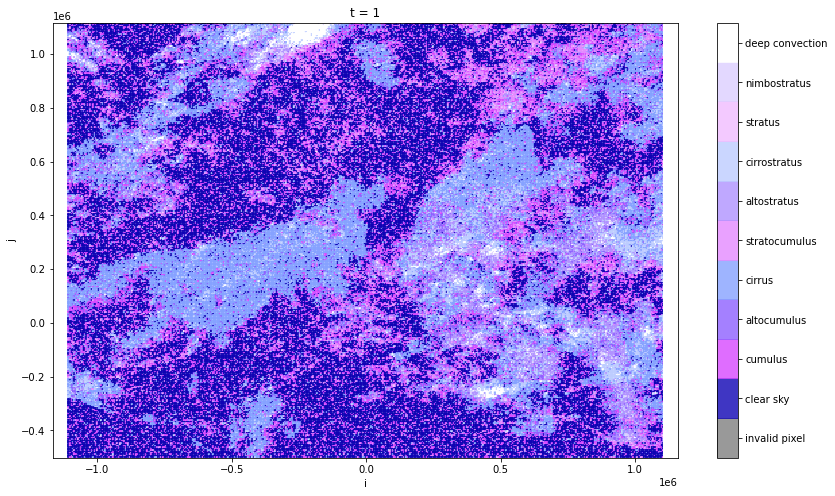

In [35]:
fig = mp.plotCT(x.ct.sel(t = 1))
plt.show()

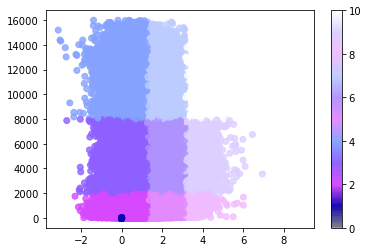

In [36]:
bounds = np.linspace(-.5, 10.5, 12)
fig = plt.scatter(x.d.sel(t = 10), x.h.sel(t = 10), c = x.ct.sel(t = 10), vmin = 0, vmax = 10, cmap = mp.cmap)

plt.colorbar()



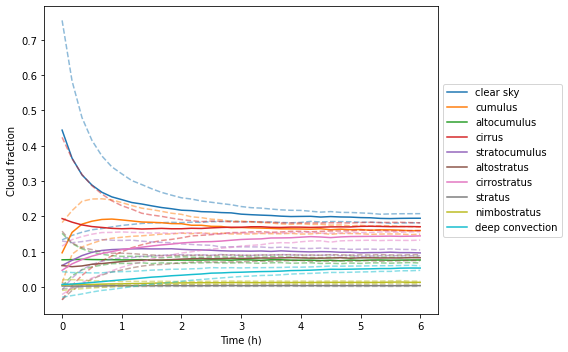

In [37]:
mp.plotCloudFrac(x, t = x.t/6)
plt.savefig('../fig/model1/cloudfraction')

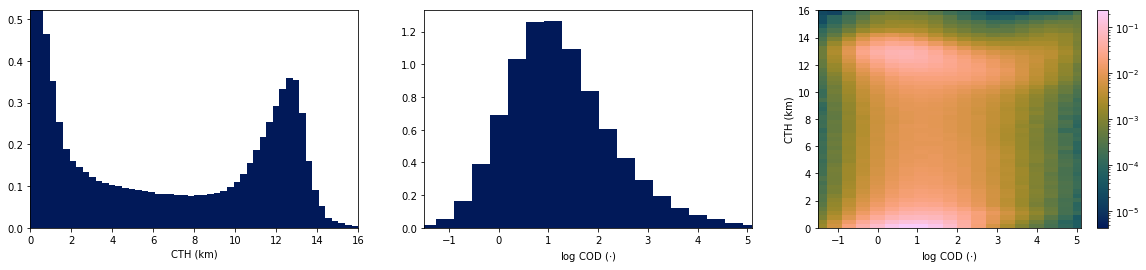

In [29]:
z = x.z.data.flatten()

freq, dedges, hedges = np.histogram2d(x.d.data.flatten()[~z], x.h.data.flatten()[~z] * 1e-3, bins = 50, density = True)

mp.plotCloudHist_f(dedges, hedges * 1e3, freq)

plt.savefig('../fig/model1/simulation_cloud_distr')

In [30]:
n = 10000
df = pd.read_csv(f'../data/simulation/model1/sim_n={n}.csv') # check whether this is the correct simulation output
df_cc = df.dropna()


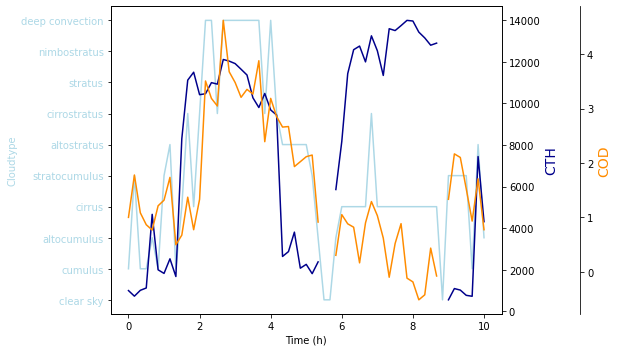

In [12]:
# plt.plot(df.loc[:100,'ISCCP'])
# df.cloud.unique()
levels = np.arange(11)

n = 60
t = np.arange(n + 1) / 6 # hours
one_pixel = df.loc[:n,'ISCCP']
fig, ax = plt.subplots(figsize = (9, 5))
plt.plot(t, one_pixel, color = 'lightblue')
plt.yticks(levels[1:], labels = list(util.ISCCP_classes.values())[1:], color = 'lightblue')
plt.ylabel('Cloudtype', color = 'lightblue')

ax2=ax.twinx()
ax2.plot(t, df.loc[:n,'h_t'],color="darkblue")
ax2.set_ylabel("CTH",color="darkblue",fontsize=14)

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes',1.20))
ax3.plot(t, df.loc[:n,'d_t'],color="darkorange")
ax3.set_ylabel("COD",color="darkorange",fontsize=14)


ax.set_xlabel('Time (h)')
plt.tight_layout()
plt.savefig('../fig/model1/one_pixel_path')
plt.show()


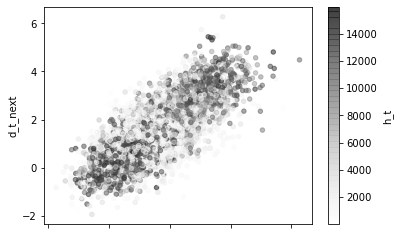

In [13]:
df_cc.plot.scatter('d_t', 'd_t_next', alpha = .5, c = 'h_t')

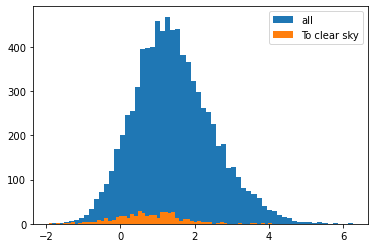

In [14]:
plt.hist(df.loc[:,'d_t'], bins = 60, label = 'all')
plt.hist(df.loc[df.cloud_next == 'clear sky'].d_t, bins = 60, label = 'To clear sky')
plt.legend()


In [15]:
pd.crosstab(df.cloud, df.cloud_next, rownames=['from'], colnames=[ 'to'], margins = True, normalize = 'index')

to,clear sky,cloud
from,,
clear sky,0.717340,0.282660
cloud,0.057246,0.942754
All,0.168417,0.831583


Text(0.5, 0, 'd')

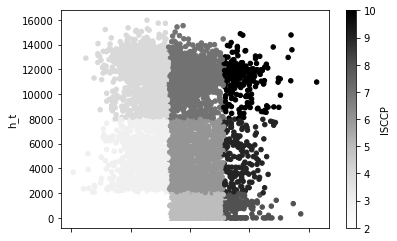

In [18]:
df.plot.scatter('d_t', 'h_t', c = 'ISCCP')
plt.xlabel('d')

to,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
from,,,,,,,,,,
1.0,0.798796,0.036968,0.039415,0.006434,0.049439,0.049137,0.009103,0.004814,0.005243,0.000651
2.0,0.451096,0.273693,0.056661,0.035413,0.133895,0.026476,0.015346,0.005565,0.001349,0.000506
3.0,0.450127,0.052152,0.225148,0.082869,0.025823,0.121013,0.036118,0.001519,0.003544,0.001688
4.0,0.461458,0.006657,0.067624,0.313245,0.002803,0.026279,0.120182,0.000000,0.001051,0.000701
5.0,0.293296,0.183528,0.037619,0.009136,0.326750,0.067849,0.012764,0.055085,0.011958,0.002015
6.0,0.292482,0.026777,0.144954,0.035530,0.050721,0.304454,0.078656,0.006050,0.048275,0.012101
7.0,0.296101,0.000790,0.028714,0.128030,0.000790,0.074289,0.395943,0.000000,0.012908,0.062434
8.0,0.131059,0.062837,0.011670,0.000000,0.442549,0.070018,0.002693,0.236086,0.042190,0.000898
9.0,0.124539,0.002948,0.036846,0.008106,0.039794,0.349300,0.061164,0.036109,0.289609,0.051584


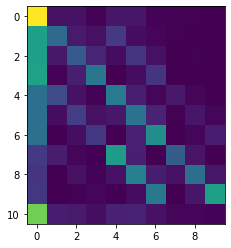

In [81]:
T_total = pd.crosstab(df.ISCCP, df.ISCCP_next, rownames=['from'], colnames=[ 'to'], normalize = 'index', margins = True)
T = T_total.iloc[:-1]
plt.imshow(T_total)
T.columns, T.index = T.columns.astype(int), T.index.astype(int)
T_total


In [77]:
util.ISCCP_classes

T.rename(columns = util.ISCCP_classes, index = util.ISCCP_classes)
imshow(T)

to,clear sky,cumulus,altocumulus,cirrus,stratocumulus,altostratus,cirrostratus,stratus,nimbostratus,deep convection
from,,,,,,,,,,
clear sky,0.798796,0.036968,0.039415,0.006434,0.049439,0.049137,0.009103,0.004814,0.005243,0.000651
cumulus,0.451096,0.273693,0.056661,0.035413,0.133895,0.026476,0.015346,0.005565,0.001349,0.000506
altocumulus,0.450127,0.052152,0.225148,0.082869,0.025823,0.121013,0.036118,0.001519,0.003544,0.001688
cirrus,0.461458,0.006657,0.067624,0.313245,0.002803,0.026279,0.120182,0.000000,0.001051,0.000701
stratocumulus,0.293296,0.183528,0.037619,0.009136,0.326750,0.067849,0.012764,0.055085,0.011958,0.002015
altostratus,0.292482,0.026777,0.144954,0.035530,0.050721,0.304454,0.078656,0.006050,0.048275,0.012101
cirrostratus,0.296101,0.000790,0.028714,0.128030,0.000790,0.074289,0.395943,0.000000,0.012908,0.062434
stratus,0.131059,0.062837,0.011670,0.000000,0.442549,0.070018,0.002693,0.236086,0.042190,0.000898
nimbostratus,0.124539,0.002948,0.036846,0.008106,0.039794,0.349300,0.061164,0.036109,0.289609,0.051584


In [9]:
T_total = pd.crosstab(df.cloud, df.cloud_next, rownames=['from'], colnames=[ 'to'], normalize = 'index', margins = True)
# T = T_total.iloc[:-1]
# plt.imshow(T_total)
# T.columns, T.index = T.columns.astype(int), T.index.astype(int)
T_total


to,clear sky,cloud
from,,
clear sky,0.798796,0.201204
cloud,0.341835,0.658165
All,0.629476,0.370524
